<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/18k_Projects.csv')

del df['Id']
del df['Name'] 
del df['Url'] 
del df['Location'] 
del df['Pledged'] 
del df['Creator'] 
del df['Category'] 
del df['Updates'] 
del df['Start'] 
del df['End']
del df['Latitude'] 
del df['Longitude']
del df['Start Timestamp (UTC)']
del df['End Timestamp (UTC)']
del df['Creator Bio'] 
del df['Creator Website']

df = pd.get_dummies(df, columns=['State', 'Currency', 'Top Category', 'Facebook Connected', 'Has Video'], drop_first=True)
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(18142, 36)

In [3]:
df.isnull().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5852
Facebook Shares                      0
Creator - # Projects Created         0
Creator - # Projects Backed       4244
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
State_successful                     0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance                   0
Top Category_Design                  0
Top Category_Fashion                 0
Top Category_Film & Video

In [7]:
# Code for obtaining correlation coefficients
#0.0은 버림 0.1은 추후 판단
df['State_successful'].corr(df['Facebook Friends'])
#0.15954024784972815
df['State_successful'].corr(df['Creator - # Projects Backed'])
#0.10624973985586753
df['State_successful'].corr(df['# Videos'])
#0.05657919078430421
df['State_successful'].corr(df['# Words (Risks and Challenges)'])
#0.007544860569767824

0.007544860569767824

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


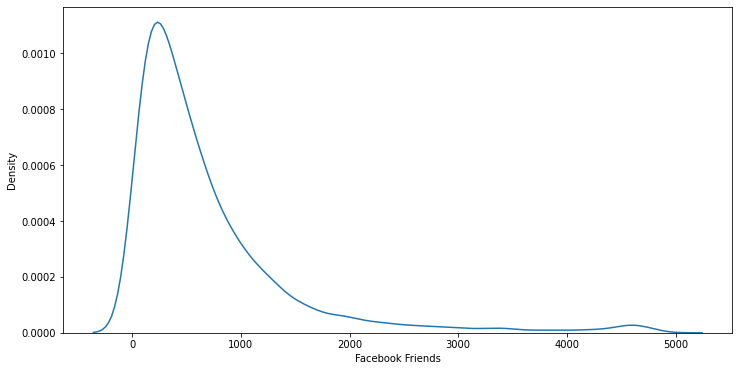

In [ ]:
#Distribution plot of variable 'Facebook Friends'  
#중간값으로 채우는게 의미가 없음
plt.figure(figsize=(12,6))
sns.distplot(df['Facebook Friends'], kde=True, hist=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


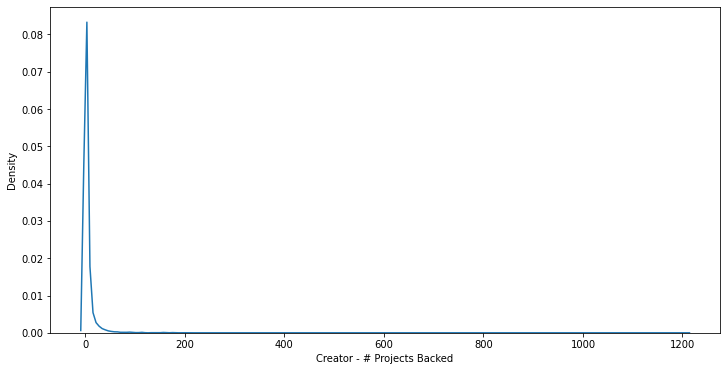

In [ ]:
#Distribution plot of variable 'Creator - # Projects Backed' 
#중간값으로 채우기
plt.figure(figsize=(12,6))  
sns.distplot(df['Creator - # Projects Backed'], kde=True, hist=0)

In [ ]:
# Fill missing values for 'Creator - # Projects Backed' with the mean value 
df['Creator - # Projects Backed'].fillna(df['Creator - # Projects Backed'].mean(), inplace=True)

In [ ]:
# Drop remaining missing values for remaining variables 
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
df.shape

(12215, 36)

In [ ]:
#x는 state_successful을 drop한 나머지 값
X = df.drop('State_successful',axis=1) 
y = df['State_successful']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

model = LogisticRegression()
model.fit(X_train, y_train)

model_predict = model.predict(X_test)

#Confusion matrix 
#172는 false-positive, 225는 false-negative, true-negative, true-positive
print(confusion_matrix(y_test, model_predict)) 

#Classification report 
print(classification_report(y_test, model_predict))

[[1657  172]
 [ 225 1611]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1829
           1       0.90      0.88      0.89      1836

    accuracy                           0.89      3665
   macro avg       0.89      0.89      0.89      3665
weighted avg       0.89      0.89      0.89      3665



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cols= df.columns.tolist()
print("new_project = [")
for item in cols:
    print("\t0, " + "#" + item)
print("]")

new_project = [0, #Comments
	9, #Rewards
	2500, #Goal
	157, #Backers
	31, #Duration in Days
	319, #Facebook Friends
	110, #Facebook Shares
	1, #Creator - # Projects Created
	0, #Creator - # Projects Backed
	0, ## Videos
	12, ## Images
	872, ## Words (Description)
	65, ## Words (Risks and Challenges)
	0, ## FAQs
	1, #Currency_CAD
	0, #Currency_EUR
	0, #Currency_GBP
	0, #Currency_NZD
	0, #Currency_USD
	0, #Top Category_Comics
	0, #Top Category_Crafts
	0, #Top Category_Dance
	0, #Top Category_Design
	0, #Top Category_Fashion
	1, #Top Category_Film & Video
	0, #Top Category_Food
	0, #Top Category_Games
	0, #Top Category_Journalism
	0, #Top Category_Music
	0, #Top Category_Photography
	0, #Top Category_Publishing
	0, #Top Category_Technology
	0, #Top Category_Theater
	0, #Facebook Connected_Yes
	1, #Has Video_Yes
]

new_pred = model.predict([new_project])
new_pred

new_project = [
	0, #Comments
	0, #Rewards
	0, #Goal
	0, #Backers
	0, #Duration in Days
	0, #Facebook Friends
	0, #Facebook Shares
	0, #Creator - # Projects Created
	0, #Creator - # Projects Backed
	0, ## Videos
	0, ## Images
	0, ## Words (Description)
	0, ## Words (Risks and Challenges)
	0, ## FAQs
	0, #State_successful
	0, #Currency_CAD
	0, #Currency_EUR
	0, #Currency_GBP
	0, #Currency_NZD
	0, #Currency_USD
	0, #Top Category_Comics
	0, #Top Category_Crafts
	0, #Top Category_Dance
	0, #Top Category_Design
	0, #Top Category_Fashion
	0, #Top Category_Film & Video
	0, #Top Category_Food
	0, #Top Category_Games
	0, #Top Category_Journalism
	0, #Top Category_Music
	0, #Top Category_Photography
	0, #Top Category_Publishing
	0, #Top Category_Technology
	0, #Top Category_Theater
	0, #Facebook Connected_Yes
	0, #Has Video_Yes
]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)